# Model optimization / futher model versions


- Linear Regression
- Polynomial Regression
- K-Nearest-Neighbors Regression
- Regression Trees / Decision Tree Regresison
- Support Vector Regression
- Logistic Regression
- Naive Bayes Classification

# 0. Import Requirements

In [297]:
# importing libraries
import pandas as pd
from sklearn import linear_model
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import PowerTransformer, PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

# 1. Load and Split data

In [298]:
train_data = pd.read_csv('new_traindata.csv')
test_data = pd.read_csv('new_testdata.csv')

In [299]:
train_data.head()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,windspeed,leaflets,price reduction,cnt
0,154,2.0,0,6,0,0,1,1,0.587133,0.161118,991,0,5312
1,685,4.0,1,11,0,6,1,2,0.324492,0.114392,601,0,5445
2,368,1.0,1,1,0,1,1,1,0.126275,0.198321,549,0,2236
3,472,2.0,1,4,1,0,0,1,0.614925,0.172953,740,0,6370
4,442,1.0,1,3,0,1,0,2,0.505046,0.089160,773,1,7836


In [300]:
test_data.head()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,windspeed,leaflets,price reduction,cnt
0,299,4.0,0,10,0,2,1,2,0.472846,0.120161,605,0,3894
1,458,2.0,1,4,0,0,1,1,0.427513,0.206779,518,0,5936
2,687,4.0,1,11,0,1,0,1,0.326383,0.139545,766,0,5629
3,346,4.0,0,12,0,2,1,1,0.270196,0.057694,739,0,3310
4,291,4.0,0,10,0,1,1,2,0.522721,0.093734,463,0,4748


In [301]:
train_features = train_data.iloc[:, :-1]
train_labels = train_data.iloc[:, -1:]

test_features = test_data.iloc[:, :-1]
test_labels = test_data.iloc[:, -1:]

# train_features
# train_labels
# test_features
# test_labels

# 3. Model building

### 2. Polynomial Regression

In [302]:
degree = 2

poly_model = make_pipeline(PolynomialFeatures(degree), linear_model.LinearRegression())
poly_model.fit(train_features, train_labels)

poly_prediction = poly_model.predict(test_features)

In [303]:
# Evaluate model

#Return Mean Absolute Error -> Loss: The beste Value is 0.0
mae = mean_absolute_error(test_labels, poly_prediction)
print('MAE: %.3f' % mae)

#Return the coefficient of determination R^2 of the prediction -> Score: best possible value is 1.0
print("R^2 value of the model: ",poly_model.score(test_features, test_labels))

MAE: 804.847
R^2 value of the model:  0.4211081632942363


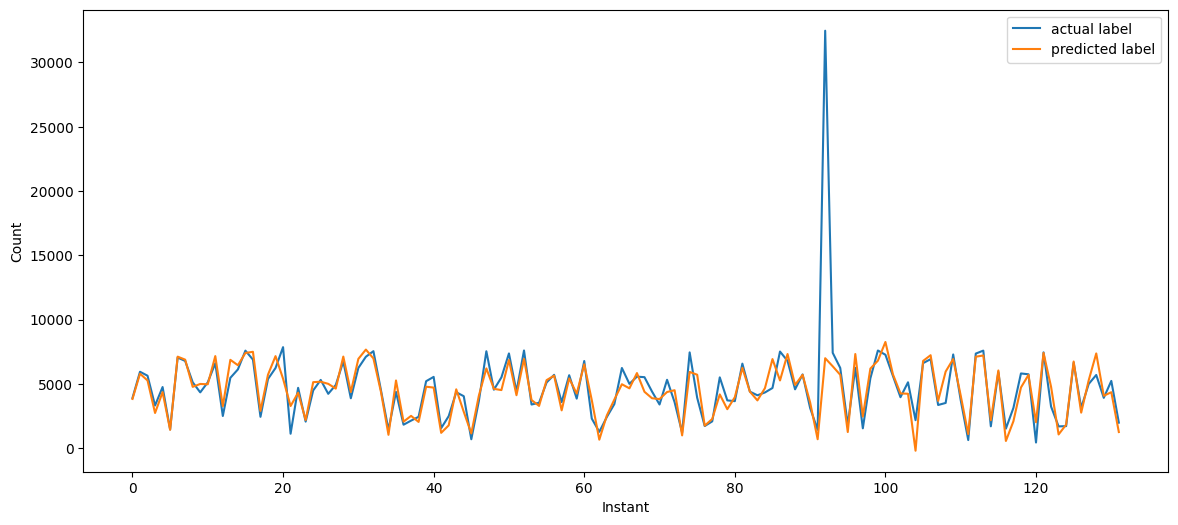

In [304]:
# Visualize the output
plt.figure(figsize=(14,6))
plt.plot(test_labels, label='actual label')
plt.plot(poly_prediction, label='predicted label')
plt.xlabel('Instant')
plt.ylabel('Count')
plt.legend()

### 3. K-Nearest-neighbours Regression

In [305]:
knn_model = KNeighborsRegressor(n_neighbors=10)
knn_model.fit(train_features, train_labels)

knn_prediction = knn_model.predict(test_features)

In [306]:
# Evaluate model

#Return Mean Absolute Error -> Loss: The beste Value is 0.0
mae = mean_absolute_error(test_labels, knn_prediction)
print('MAE: %.3f' % mae)

#Return the coefficient of determination R^2 of the prediction -> Score: best possible value is 1.0
print("R^2 value of the model: ",knn_model.score(test_features, test_labels))

MAE: 958.980
R^2 value of the model:  0.3550701432018142


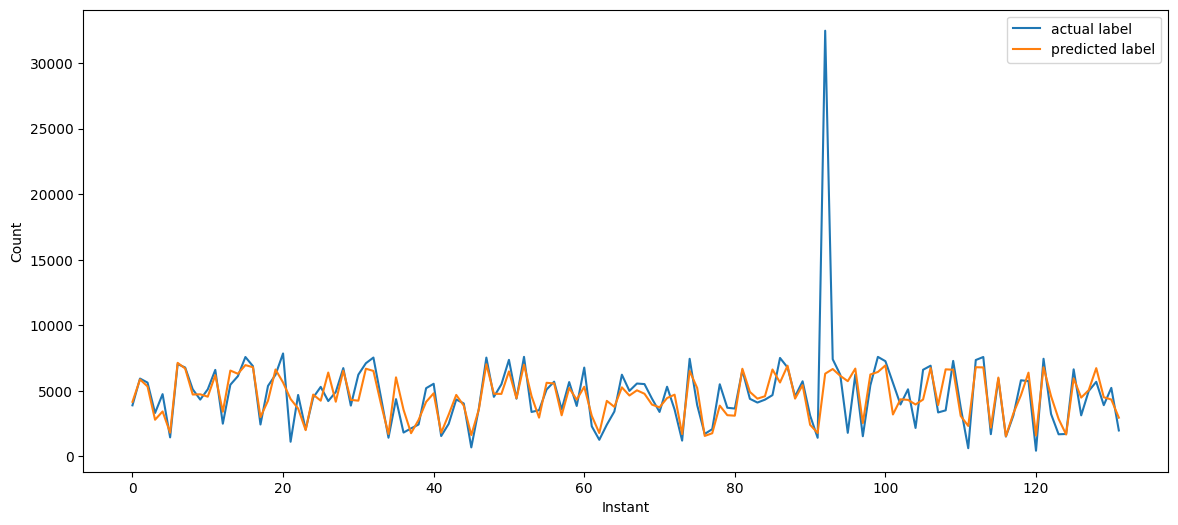

In [307]:
# Visualize the output
plt.figure(figsize=(14,6))
plt.plot(test_labels, label='actual label')
plt.plot(knn_prediction, label='predicted label')
plt.xlabel('Instant')
plt.ylabel('Count')
plt.legend()

### 4. Regression Tree / Decision Tree Regression

In [308]:
tree_model = DecisionTreeRegressor(random_state=0, max_depth=3)
tree_model.fit(train_features, train_labels)

tree_prediction = tree_model.predict(test_features)

In [309]:
# Evaluate model

#Return Mean Absolute Error -> Loss: The beste Value is 0.0
mae = mean_absolute_error(test_labels, tree_prediction)
print('MAE: %.3f' % mae)

#Return the coefficient of determination R^2 of the prediction -> Score: best possible value is 1.0
print("R^2 value of the model: ",tree_model.score(test_features, test_labels))

MAE: 877.078
R^2 value of the model:  0.40351472228200236


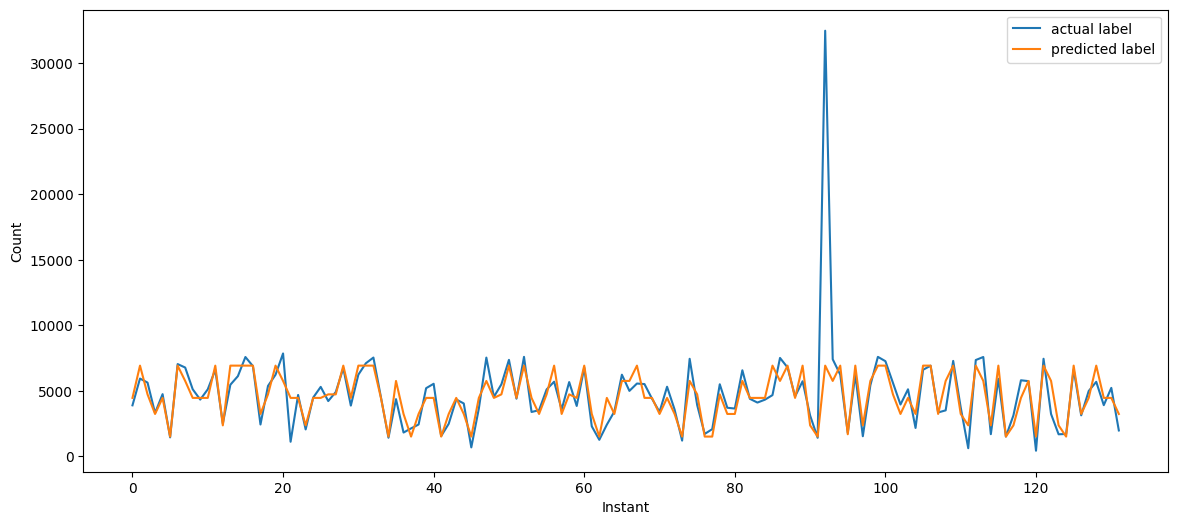

In [310]:
# Visualize the output
plt.figure(figsize=(14,6))
plt.plot(test_labels, label='actual label')
plt.plot(tree_prediction, label='predicted label')
plt.xlabel('Instant')
plt.ylabel('Count')
plt.legend()

### 5. Support Vecotr Regression

In [311]:
svr_model = SVR(kernel='linear')
svr_model.fit(train_features, train_labels)

svr_prediction = svr_model.predict(test_features)

c:\Users\Akira\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [312]:
# Evaluate model

#Return Mean Absolute Error -> Loss: The beste Value is 0.0
mae = mean_absolute_error(test_labels, svr_prediction)
print('MAE: %.3f' % mae)

#Return the coefficient of determination R^2 of the prediction -> Score: best possible value is 1.0
print("R^2 value of the model: ",svr_model.score(test_features, test_labels))

MAE: 1294.168
R^2 value of the model:  0.2749600648141377


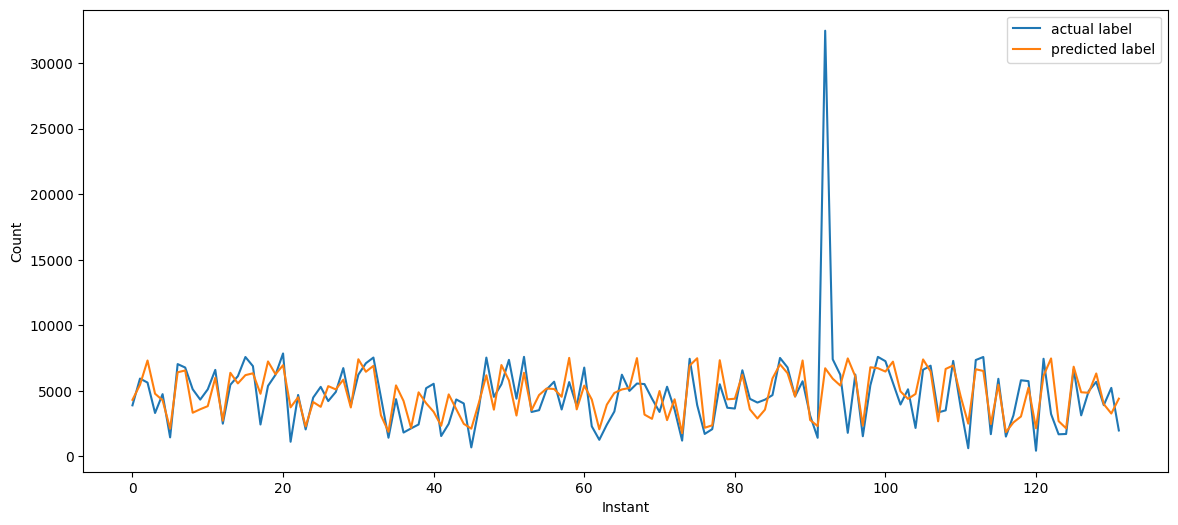

In [313]:
# Visualize the output
plt.figure(figsize=(14,6))
plt.plot(test_labels, label='actual label')
plt.plot(svr_prediction, label='predicted label')
plt.xlabel('Instant')
plt.ylabel('Count')
plt.legend()

### 6. Logistic Regression

In [314]:
log_model = linear_model.LogisticRegression(random_state=0)
log_model.fit(train_features, train_labels)

log_prediction = log_model.predict(test_features)

c:\Users\Akira\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Akira\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [315]:
# Evaluate model

#Return Mean Absolute Error -> Loss: The beste Value is 0.0
mae = mean_absolute_error(test_labels, log_prediction)
print('MAE: %.3f' % mae)

#Return the coefficient of determination R^2 of the prediction -> Score: best possible value is 1.0
print("R^2 value of the model: ",log_model.score(test_features, test_labels))

MAE: 1521.803
R^2 value of the model:  0.0


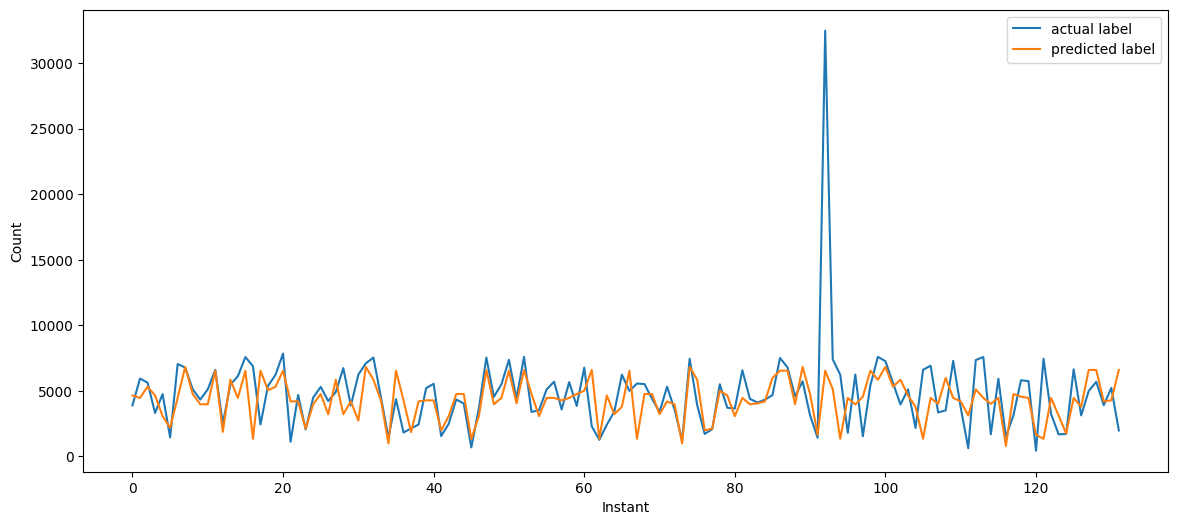

In [316]:
# Visualize the output
plt.figure(figsize=(14,6))
plt.plot(test_labels, label='actual label')
plt.plot(log_prediction, label='predicted label')
plt.xlabel('Instant')
plt.ylabel('Count')
plt.legend()

### 7. Naive Bayes Classification

In [317]:
knnClass_model = KNeighborsClassifier(n_neighbors=10)
knnClass_model.fit(train_features, train_labels)

c:\Users\Akira\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=10)

In [318]:
knnClass_model.score(test_features, test_labels)

0.0